In [174]:
from neuralprophet import NeuralProphet
import pandas as pd

def make_df(filename, ID):
    df = pd.read_csv(filename)        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df


def make_df_inter(filename, ID):
    df = pd.read_csv(filename)

    df.rename(columns={'Date': 'ds', 'S': 'y'}, inplace=True)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace=True)
    df_daily = df.resample('D').mean()

    df_daily['H'].fillna(method='ffill', inplace=True)

    df_daily = df_daily.interpolate(method='linear')
    df = df_daily.reset_index()

    df['ID'] = ID
    df = df[['ds', 'y', 'H', 'ID']]

    return df


# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')


In [197]:
dfset1 = pd.concat((df2, df5, df6, df7, df8)) # 1
dfset2 = df4 # 3
dfset2 = pd.concat((df3, df4)) # 3

In [176]:

m1 = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  optimizer = 'AdamW'
                  )
m1 = m1.add_future_regressor(name='H', normalize=True)
metrics = m1.fit(dfset1)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 

Training: 0it [00:00, ?it/s]

In [198]:
m2 = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  optimizer = 'AdamW',
                  )
m2 = m2.add_future_regressor(name='H', normalize=True)
metrics = m2.fit(dfset2)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.forecaster.__handle_missing_data) - dropped 236 NAN row in 'y'
INFO - (NP.forecaster.__handle_missing_data) - dropped 236 NAN row in 'y'
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.

Training: 0it [00:00, ?it/s]

In [ ]:
forecast1 = m1.predict(df1)
m1.plot(forecast1)
forecast1

In [ ]:
import matplotlib.pyplot as plt

def RMSE(result):
    cnt = 0
    SE = 0
    for idx, row in result.dropna().iterrows():
        cnt += 1
        SE += (row['y']-row['yhat1'])**2
    return (SE/cnt)**(1/2)
    # return (SE/cnt)

rmse = RMSE(forecast1)


plt.scatter(forecast1['ds'], forecast1['y'],
            label='Actual', s=10, color='black')
plt.plot(forecast1['ds'], forecast1['yhat1'], label='Forecast')
plt.text(pd.datetime(2021,10,5),2,f'RMSE : {rmse%10000}')
plt.text(pd.datetime(2021,9,7),9,'H : 0.62')
plt.text(pd.datetime(2021,10,12),19,'H : 2.232')
plt.text(pd.datetime(2021,10,26),30,'H : 3.224')
plt.text(pd.datetime(2021,12,4),38,'H : 3.596')
plt.text(pd.datetime(2021,12,23),41,'H : 4.092')
plt.text(pd.datetime(2022,1,15),47,'H : 4.464')
plt.xticks(rotation=45)
plt.title('H-S_seq_1')
plt.xlabel('Date')
plt.ylabel('S')
plt.legend()
plt.show()
RMSE(forecast1)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 8it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


,ds,y,ID,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data5,0.776722,0.776722,0.000000,0.000000
1,2021-08-07,NaN,data5,0.800709,0.800709,0.000000,0.000000
2,2021-08-08,NaN,data5,0.824695,0.824695,0.000000,0.000000
3,2021-08-09,NaN,data5,0.848682,0.848682,0.000000,0.000000
4,2021-08-10,NaN,data5,0.872669,0.872669,0.000000,0.000000
...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data5,65.135925,22.581045,42.554882,42.554882
294,2022-05-27,57.288,data5,65.142281,22.587395,42.554882,42.554882
295,2022-05-28,NaN,data5,65.148628,22.593744,42.554882,42.554882
296,2022-05-29,NaN,data5,65.154976,22.600094,42.554882,42.554882


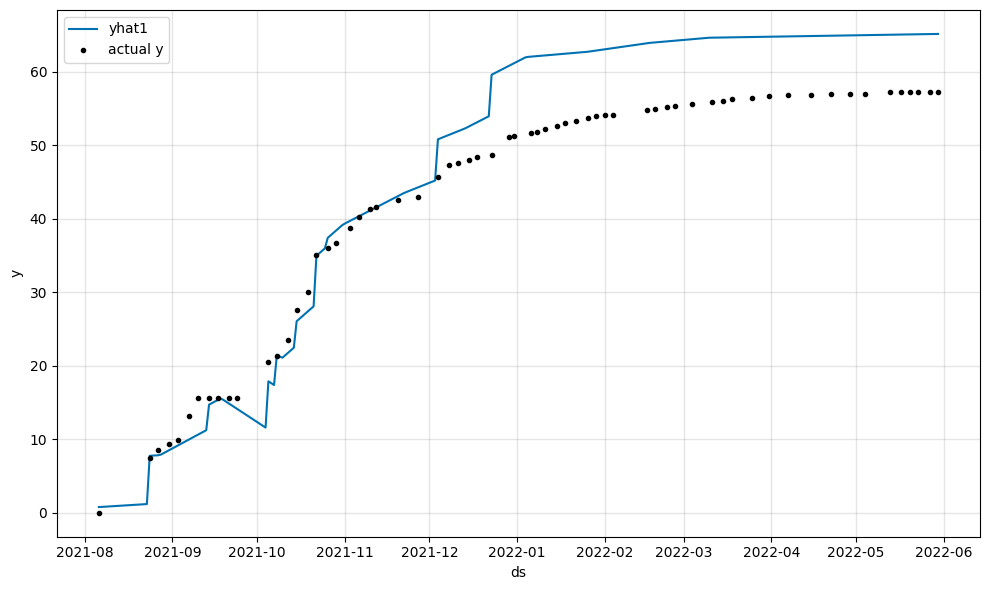

In [203]:
forecast2 = m2.predict(df5)
m2.plot(forecast2)
forecast2

WARNING - (py.warnings._showwarnmsg) - C:\Users\전현수\AppData\Local\Temp\ipykernel_22300\2821008401.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.text(pd.datetime(2021, 10, 5), 2, f'RMSE : {rmse%10000}')

WARNING - (py.warnings._showwarnmsg) - C:\Users\전현수\AppData\Local\Temp\ipykernel_22300\2821008401.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.text(pd.datetime(2021, 9, 7), 9, 'H : 0.62')

WARNING - (py.warnings._showwarnmsg) - C:\Users\전현수\AppData\Local\Temp\ipykernel_22300\2821008401.py:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.text(pd.datetime(2021, 10, 12), 19, 'H : 1.86')

WARNING - (py.warnings._showwarnmsg) - C:\Users\전현수\AppData\Local\Temp\ipykern

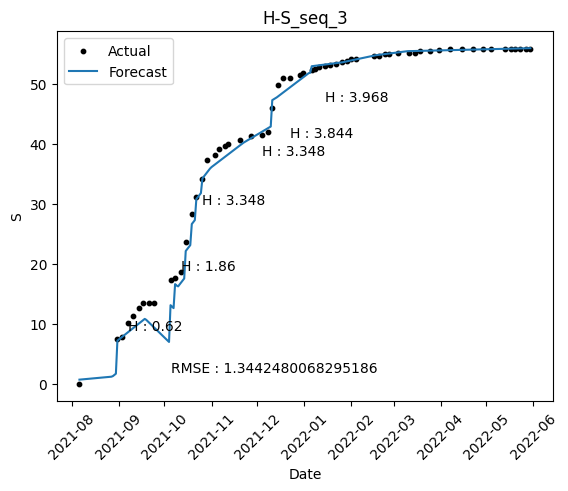

1.3442480068295186

In [200]:
import matplotlib.pyplot as plt


def RMSE(result):
    cnt = 0
    SE = 0
    for idx, row in result.dropna().iterrows():
        cnt += 1
        SE += (row['y']-row['yhat1'])**2
    return (SE/cnt)**(1/2)
    # return (SE/cnt)


rmse = RMSE(forecast2)


plt.scatter(forecast2['ds'], forecast2['y'],
            label='Actual', s=10, color='black')
plt.plot(forecast2['ds'], forecast2['yhat1'], label='Forecast')
plt.text(pd.datetime(2021, 10, 5), 2, f'RMSE : {rmse%10000}')
plt.text(pd.datetime(2021, 9, 7), 9, 'H : 0.62')
plt.text(pd.datetime(2021, 10, 12), 19, 'H : 1.86')
plt.text(pd.datetime(2021, 10, 26), 30, 'H : 3.348')
plt.text(pd.datetime(2021, 12, 4), 38, 'H : 3.348')
plt.text(pd.datetime(2021, 12, 23), 41, 'H : 3.844')
plt.text(pd.datetime(2022, 1, 15), 47, 'H : 3.968')
plt.xticks(rotation=45)
plt.title('H-S_seq_3')
plt.xlabel('Date')
plt.ylabel('S')
plt.legend()
plt.show()
RMSE(forecast2)
